# StarGAN
GAN can not only generate fake realistic images, it can also generate fake images according to desired properties. StarGAN is able to ranslate an input image to any desired target domain. Given a source image and a few attributes we want(so called target domain) for the resulting image, StarGAN can generate desired realistic fake images.

![title](images/intro.jpg)


In [1]:
%matplotlib inline
import os
import numpy as np
from solver import Solver
from data_loader import get_loader
from torch.backends import cudnn
import torch
import matplotlib.pyplot as plt
from torchvision import transforms as T
from torchvision.utils import save_image
from PIL import Image
from default_config import config
from detect_face import detect_face

In [2]:
def build_target():
    while True:
        try:
            print('')
            # 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'
            hair = input('Choose your desired hair color: 0 for Black_Hair, 1 for Blond_Hair, 2 for Brown_Hair ')
            hair = int(hair)
            assert hair in [0, 1, 2]
            male = input('Choose the gender you desired: 0 for Female, 1 for Male')
            male = int(male)
            assert male in [0, 1]
            age = input('Choose whether to generate aged, 0 for No, 1 for Yes: ')
            age = int(age)
            assert age in [0, 1]
            target = [0, 0, 0]
            target[hair] = 1
            target.append(male)
            target.append(1 - age)
            return target
        except Exception:
            pass
        
def showimage(img):
    npimg = img.numpy().squeeze()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

def generate_face(face):
    if face is not None:
        new_face = Image.fromarray(face)
        new_face = transform(new_face)
        new_face = torch.unsqueeze(new_face, 0) #(1,3,256,256)

        # 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young'
        new_face = new_face.to(solver.device)
        target_cls = torch.tensor(build_target()).float()
        target_cls = torch.unsqueeze(target_cls, 0)
        target_cls = target_cls.to(solver.device)
        gen_face = solver.G(new_face, target_cls)
        gen_face = solver.denorm(gen_face.detach().cpu())
        showimage(gen_face)

    else:
        print("No face detected!")

### Load model

In [3]:
# set config
config.mode = 'test'
config.dataset = 'CelebA'
config.image_size = 256
config.c_dim = 5
config.selected_attrs = ['Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Male', 'Young']
config.model_save_dir = 'stargan_celeba_256/models'
config.result_dir = 'stargan_celeba_256/results'

# solver
solver = Solver(None, None, config)
solver.restore_model(solver.test_iters)
transform = []
transform.append(T.Resize(config.image_size))
transform.append(T.ToTensor())
transform.append(T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)))
transform = T.Compose(transform)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/pyth

Loading the trained models from step 200000...


### Load image and transfer

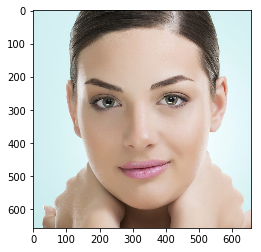

In [10]:
face = detect_face('./images/02.jpg')
plt.imshow(face)
plt.show()


Choose your desired hair color: 0 for Black_Hair, 1 for Blond_Hair, 2 for Brown_Hair 1
Choose the gender you desired: 0 for Female, 1 for Male1
Choose whether to generate aged, 0 for No, 1 for Yes: 0


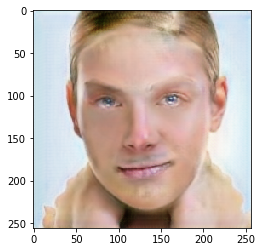

In [11]:
generate_face(face)

# 